**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

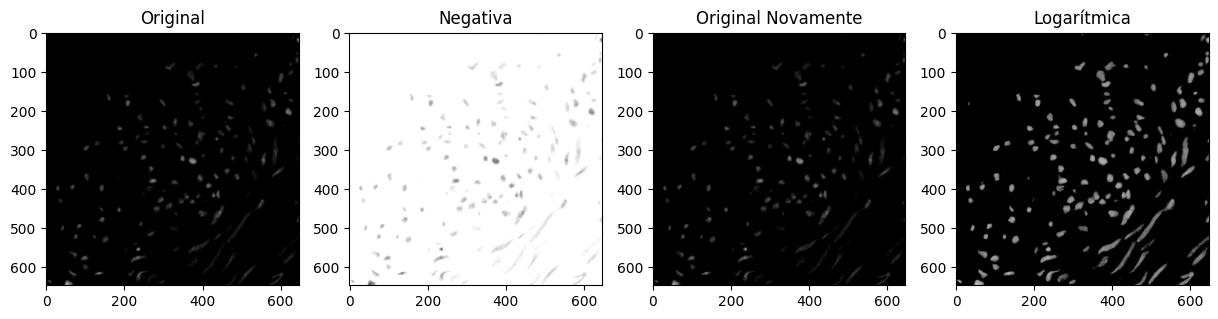

r = 0 s = 0.0
r = 1 s = 31.875
r = 2 s = 50.52067971048686
r = 3 s = 63.75
r = 4 s = 74.01145802453468
r = 5 s = 82.39567971048685
r = 6 s = 89.48443814058612
r = 7 s = 95.62499999999999
r = 8 s = 101.04135942097372
r = 9 s = 105.88645802453469
r = 10 s = 110.26938284406386
r = 11 s = 114.27067971048686
r = 12 s = 117.95151601574732
r = 13 s = 121.35943814058612
r = 14 s = 124.53213773502152
r = 15 s = 127.5
r = 16 s = 130.28787806485457
r = 17 s = 132.9163594209737
r = 18 s = 135.40268949101429
r = 19 s = 137.76145802453468
r = 20 s = 140.00511785107298
r = 21 s = 142.14438284406387
r = 22 s = 144.18853734931727
r = 23 s = 146.14567971048686
r = 24 s = 148.02291604906935
r = 25 s = 149.8265160157473
r = 26 s = 151.56203913146055
r = 27 s = 153.23443814058612
r = 28 s = 154.84814421969136
r = 29 s = 156.40713773502154
r = 30 s = 157.91500739358165
r = 31 s = 159.375
r = 32 s = 160.7900625545507
r = 33 s = 162.16287806485457
r = 34 s = 163.4958961651208
r = 35 s = 164.7913594209737
r = 

In [5]:
def explain_log_transform():
    """
    Função para explicar a transformação logarítmica
    A função logarítimica aumenta a percepeção dos objetos na imagem img_cells.png porque ela aguça as intensidades que não são "tão escuras".
    Por exemplo, a intensidade 9 (bem escura) é mapeada para a intensidade 105 (mais cinza) logo mais perceptível.
    Esse processo continua, aumentando todas as intensidades mais baixas, exceto a 0.
    """
    for r in range(256):
        s = (255 / np.log(1 + 255)) * np.log(1 + r)
        print("r = {} s = {}".format(r, s))

def log_transform(img):
    '''
    Transformação logarítmica: Tenha cuidado com o valor de c, pois log(0) não existe. Assim, c é calculado como:
    c = 255 / log(1 + np.max(img)) pois o valor de intensidade máximo de nossa imagem é 255. Assim garantiremos que o resultado também se enquadra dentro desse intervalo. Perceba que uma versão "naive" da transformação logarítimica seria s = log(1 + r). Porém, isso apenas avaliaria a intensidade máxima de log(1 + 255), log(256) = 2.408. Assim, a imagem resultante seria muito escura.
    :param img:Imagem a ser transformada
    :return:
    '''
    c = np.max(img) / np.log(1 + np.max(img))
    img_log = c * np.log(1 + img)
    img_log = np.array(img_log, dtype=np.uint8)
    return img_log

# Negative Image
img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
img_neg = 255 - img
back_orig = 255 - img_neg
img_log = log_transform(img)

f, axarr = plt.subplots(1, 4, figsize=(15, 15))
axarr[0].set_title('Original')
axarr[0].imshow(img, cmap='gray', vmin=0, vmax=255)

axarr[1].set_title('Negativa')
axarr[1].imshow(img_neg, cmap='gray', vmin=0, vmax=255)

axarr[2].set_title('Original Novamente')
axarr[2].imshow(back_orig, cmap='gray', vmin=0, vmax=255)

axarr[3].set_title('Logarítmica')
axarr[3].imshow(img_log, cmap='gray', vmin=0, vmax=255)

plt.show()
explain_log_transform()

2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



(291, 240)


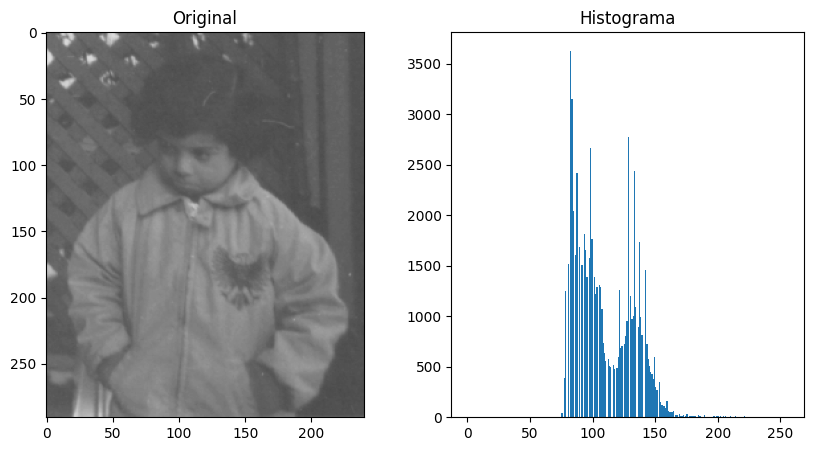

In [4]:
# Opening image
img = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)
print(img.shape)

# Showing image
f, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].set_title('Original')
axarr[0].imshow(img, cmap='gray' ,vmin=0, vmax=255)

axarr[1].set_title('Histograma')
axarr[1].hist(img.ravel(), 256, [0, 256])

plt.show()
# Showing histogram
# plt.hist(img.ravel(), 256, [0, 256])

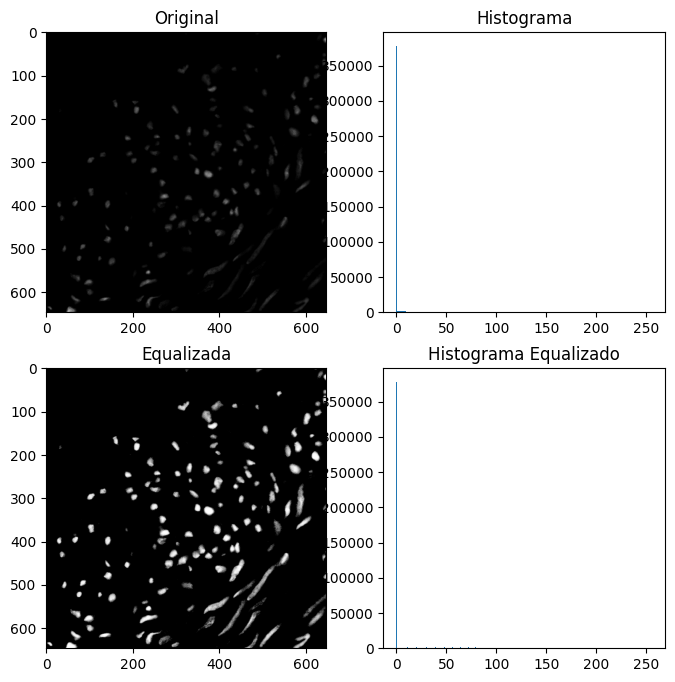

In [6]:
# Equalizando a imagem
img_equalizada = cv2.equalizeHist(img)

# Showing image
f, axarr = plt.subplots(2, 2, figsize=(8, 8))
axarr[0][0].set_title('Original')
axarr[0][0].imshow(img, cmap='gray' ,vmin=0, vmax=255)

axarr[0][1].set_title('Histograma')
axarr[0][1].hist(img.ravel(), 256, [0, 256])

axarr[1][0].set_title('Equalizada')
axarr[1][0].imshow(img_equalizada, cmap='gray' ,vmin=0, vmax=255)

axarr[1][1].set_title('Histograma Equalizado')
axarr[1][1].hist(img_equalizada.ravel(), 256, [0, 256])

plt.show()

CDF MAX: {} 69840


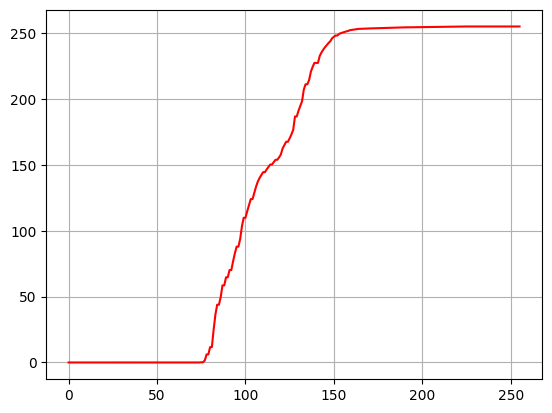

In [36]:
# Plotando a curva de transformação
# hist contém o histograma da imagem original. Ou seja a contagem de frequência de cada intensidade
L = 256
hist, bins = np.histogram(img.ravel(), L, [0, L])
# cdf contém a Cumulative Distribution Function (CDF)
cdf = hist.cumsum()
# Equalizando a CDF
# cdf.max = número de pixel na imagem, uma vez que o valor máximo da CDF é o total da soma de frequencias de intensidade da imagem
# Para 0 <= r < L | s = (L-1) * CDF(r)/(Total of pixels)
print('CDF MAX: {}', cdf.max())
cdf_equalized = (cdf / cdf.max() ) * (L - 1)

plt.plot(cdf_equalized, color = 'r')
plt.grid()


3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

(647, 647)
(647, 647)
(647, 647)


' Resultado: A primeira equalização de histograma é significante pois deixa a distribuição de instensidades mais uniforme.\nJá as subsequentes não tem tanto efeito uma vez que a distribuição já está bem próxima de ser uniforme. '

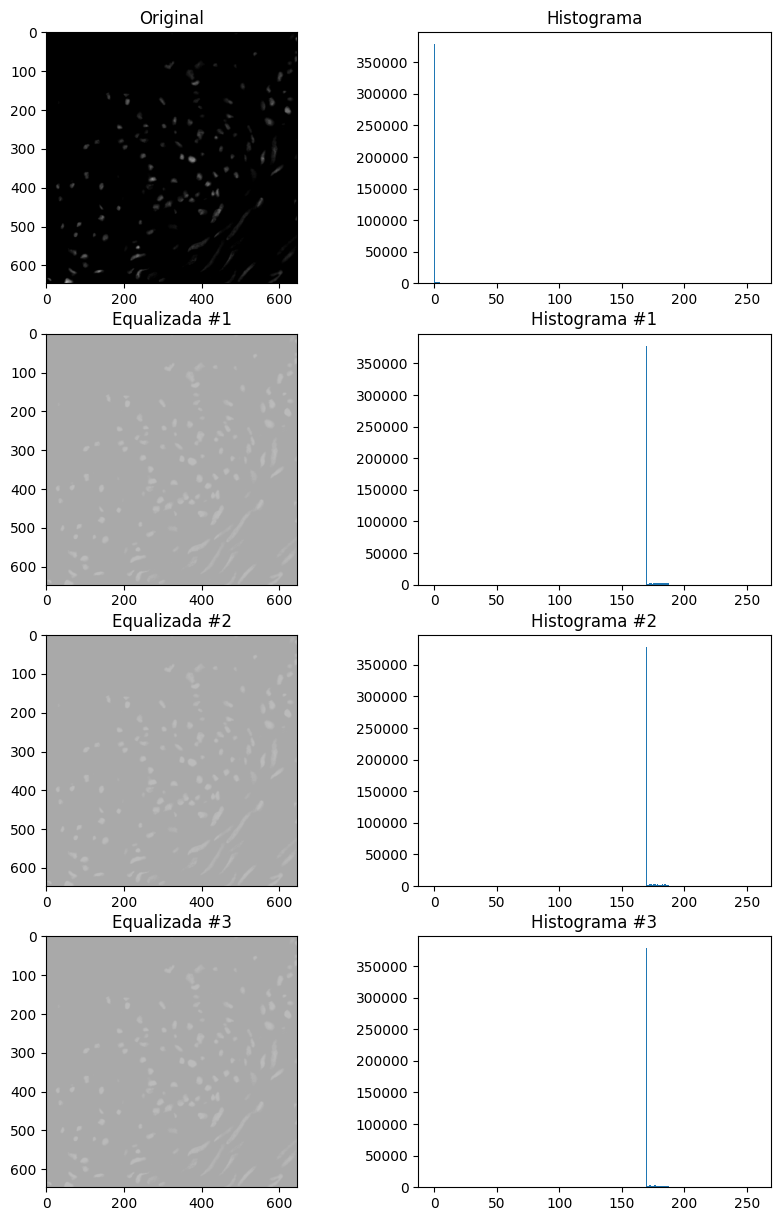

In [8]:
# calculando histograma de uma imagem
def histogram(img, max_value):
    print(img.shape)
    l_hist = np.zeros(max_value + 1, dtype=np.uint32)
    np.add.at(l_hist, img, 1)
    return l_hist

def equalization_transformation_curve(img, max_value):
    l_hist = histogram(img, max_value)
    l_cdf = np.cumsum(l_hist)
    tr_equalized = l_cdf/max(l_cdf) * max_value
    return tr_equalized.astype(np.uint8)

def equalize_image_histogram(img, max_value):
    transform = equalization_transformation_curve(img, max_value)
    return transform[img]

img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
L = max(img.ravel())
# Equalizando primeira vez
eq_img_1 = equalize_image_histogram(img, L)

# Equalizando segunda vez
eq_img_2 = equalize_image_histogram(eq_img_1, L)

# Equalizando terceira vez
eq_img_3 = equalize_image_histogram(eq_img_2, L)

# Mostrando imagem
f, axarr = plt.subplots(4, 2, figsize=(10, 15))
axarr[0][0].set_title('Original')
axarr[0][0].imshow(img, cmap='gray' ,vmin=0, vmax=255)

axarr[0][1].set_title('Histograma')
axarr[0][1].hist(img.ravel(), 256, [0, 256])

axarr[1][0].set_title('Equalizada #1')
axarr[1][0].imshow(eq_img_1, cmap='gray' ,vmin=0, vmax=255)

axarr[1][1].set_title('Histograma #1')
axarr[1][1].hist(eq_img_1.ravel(), 256, [0, 256])

axarr[2][0].set_title('Equalizada #2')
axarr[2][0].imshow(eq_img_2, cmap='gray' ,vmin=0, vmax=255)

axarr[2][1].set_title('Histograma #2')
axarr[2][1].hist(eq_img_2.ravel(), 256, [0, 256])

axarr[3][0].set_title('Equalizada #3')
axarr[3][0].imshow(eq_img_3, cmap='gray' ,vmin=0, vmax=255)

axarr[3][1].set_title('Histograma #3')
axarr[3][1].hist(eq_img_3.ravel(), 256, [0, 256])

""" Resultado: A primeira equalização de histograma é significante pois deixa a distribuição de instensidades mais uniforme.
Já as subsequentes não tem tanto efeito uma vez que a distribuição já está bem próxima de ser uniforme. """

(array([3.78408e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.66300e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.56400e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.53800e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.42400e+03,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.36700e+03, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.28200e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.28000e+03,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

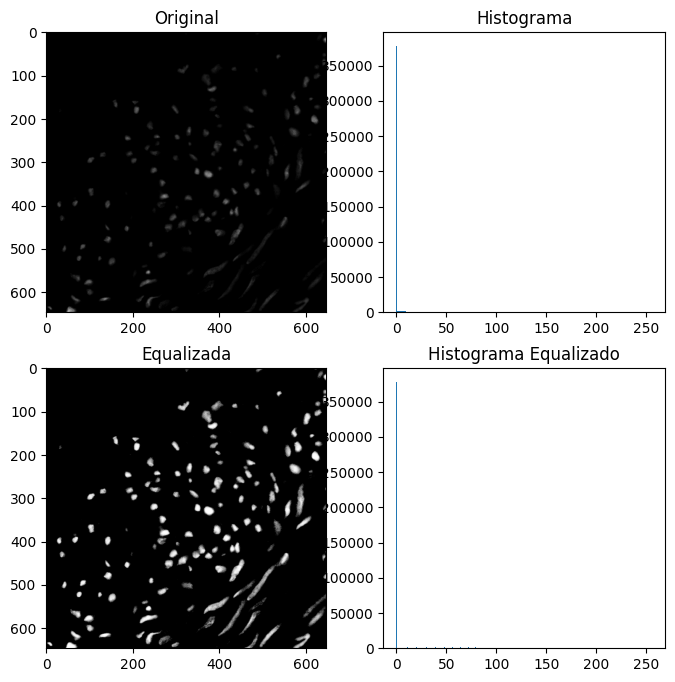

In [9]:
img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
img_equalizada = cv2.equalizeHist(img)

# Showing image
f, axarr = plt.subplots(2, 2, figsize=(8, 8))
axarr[0][0].set_title('Original')
axarr[0][0].imshow(img, cmap='gray' ,vmin=0, vmax=255)

axarr[0][1].set_title('Histograma')
axarr[0][1].hist(img.ravel(), 256, [0, 256])

axarr[1][0].set_title('Equalizada')
axarr[1][0].imshow(img_equalizada, cmap='gray' ,vmin=0, vmax=255)

axarr[1][1].set_title('Histograma Equalizado')
axarr[1][1].hist(img_equalizada.ravel(), 256, [0, 256])